# Figure 4: First authors

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

import plot_info # Does this set the plot style ? Yes it does
import wrangling
import stat_lib

assessment_columns = plot_info.assessment_columns

first_author_claims = pd.read_csv("preprocessed_data/first_author_claims.csv")

author_metrics = wrangling.create_author_metric(claim_df=first_author_claims, 
                                                variable='first_author_key', other_col={"First Author Name":('First Author Name', 'first')})

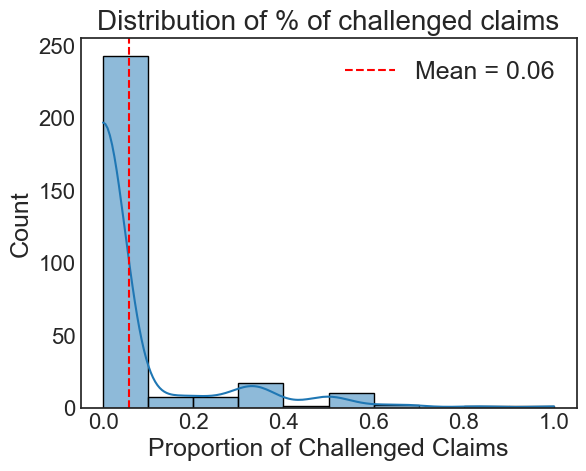

Descriptive Statistics:


,Unchallenged,Verified,Partially Verified,Mixed,Challenged,Unchallenged prop,Verified prop,Partially Verified prop,Mixed prop,Challenged prop,Challenged prop,Articles,Major claims
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,0.820069,2.079585,0.249135,0.041522,0.238754,0.259369,0.602996,0.070079,0.009073,0.058483,0.058483,1.363322,3.429066
std,1.125222,1.727202,0.513912,0.246516,0.652256,0.344167,0.367580,0.160911,0.057098,0.153144,0.153144,0.694350,1.970966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
75%,1.000000,3.000000,0.000000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000
max,7.000000,11.000000,2.000000,2.000000,5.000000,1.000000,1.000000,1.000000,0.666667,1.000000,1.000000,5.000000,14.000000


In [2]:
descriptive_stats = author_metrics[assessment_columns + [col + ' prop' for col in assessment_columns] + 
                    ['Challenged prop', 'Articles', 'Major claims']].describe()

sns.histplot(author_metrics['Challenged prop'], kde=True)
plt.title('Distribution of % of challenged claims')
plt.xlabel('Proportion of Challenged Claims')
plt.axvline(author_metrics['Challenged prop'].mean(), color='red', linestyle='--', 
            label=f'Mean = {author_metrics["Challenged prop"].mean():.2f}')
plt.legend()
plt.show()
print("Descriptive Statistics:")
descriptive_stats

## A. Distribution plot

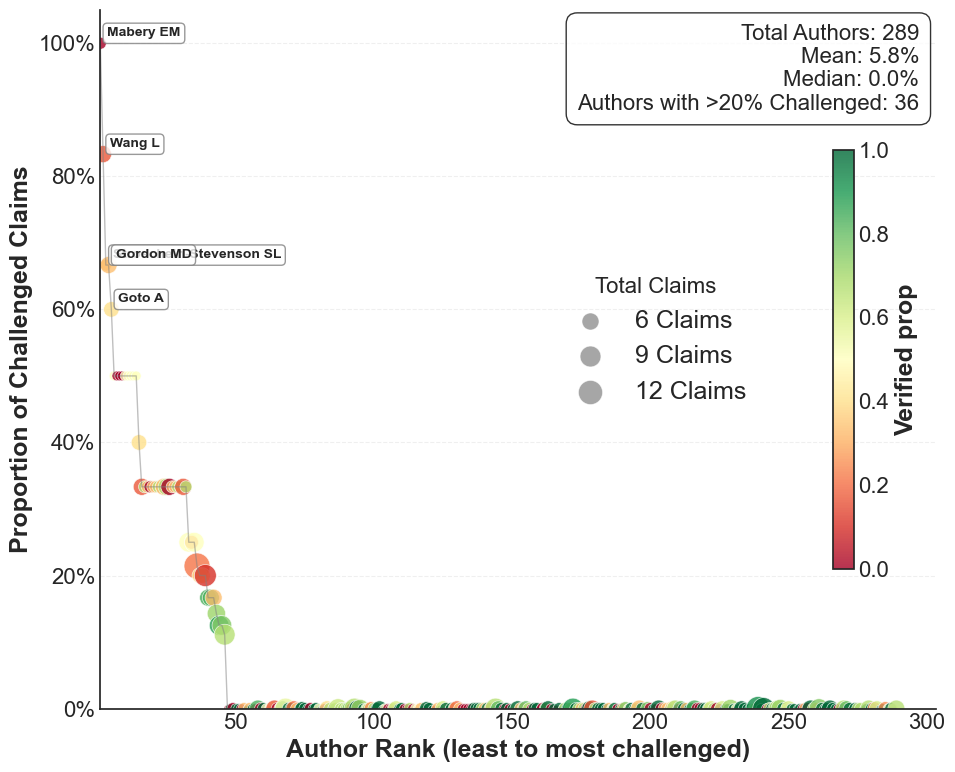

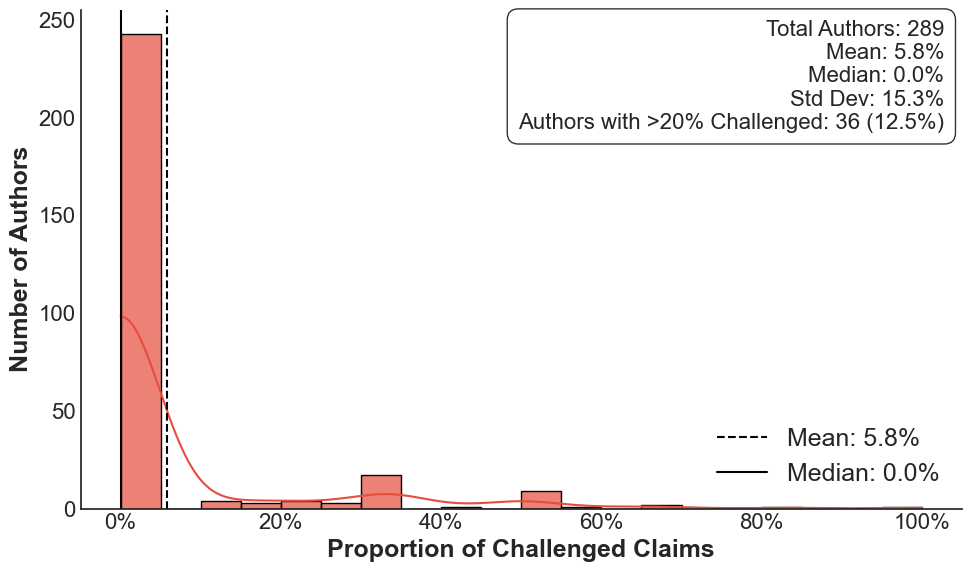

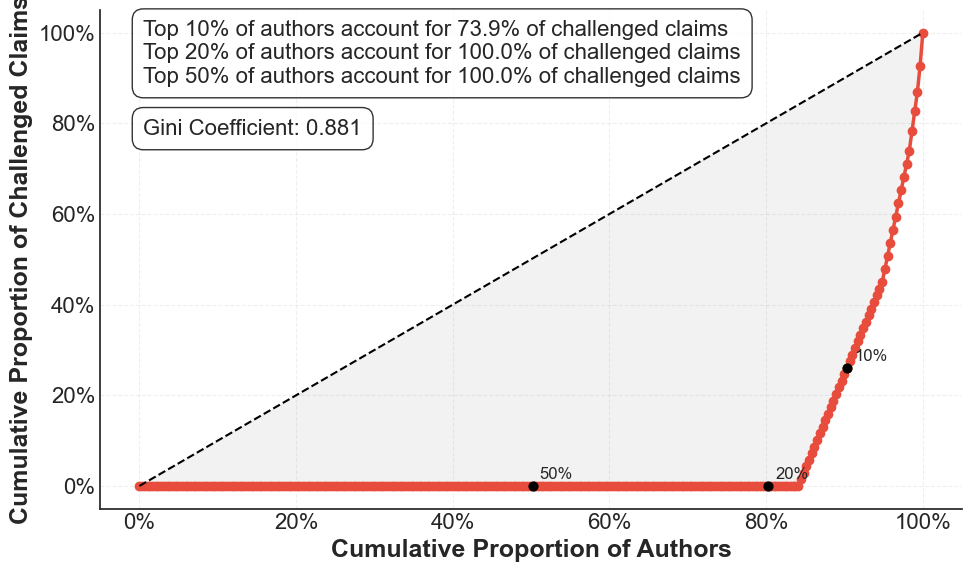

In [3]:
to_plot = author_metrics.copy()
to_plot = to_plot[to_plot['Articles'] >= 0]
to_plot = to_plot[to_plot['Major claims'] >= 0]

fig, ax = plot_info.plot_author_irreproducibility_focused(
    df=to_plot,
    title="",
    color_by='Verified prop',
    cmap='RdYlGn',  # Choose colormap that doesn't have white at minimum
    most_challenged_on_right=True,
    name_col='First Author Name',
)
plt.savefig('figures/fig4A_distribution_scatter.png', dpi=300, bbox_inches='tight')
fig1, ax1 = plot_info.plot_challenged_histogram(to_plot, title="",)
#plt.savefig('figures/fig4A-V2.png', dpi=300, bbox_inches='tight')

# Create Lorenz curve visualization
fig2, ax2 = plot_info.plot_lorenz_curve(to_plot, title="",)
plt.savefig('figures/fig4B_distribution_gini.png', dpi=300, bbox_inches='tight')

## B. Binary variables

In [4]:
first_author_claims["First Author Career Stage"].unique()

array(['PhD', 'Post-doc', 'Master', nan, 'ND', 'PI', 'Senior Staff',
       'Technician'], dtype=object)

Actual groups found: ['Master', 'ND', 'PI', 'PhD', 'Post-doc', 'Senior Staff', 'Technician']
Summary of First Author Career Stage:
                           Major claims  Articles  Verified_prop  \
First Author Career Stage                                          
Master                               18         6       0.444444   
ND                                   19         9       0.578947   
PI                                   29        13       0.689655   
PhD                                 567       226       0.589065   
Post-doc                            318       125       0.632075   
Senior Staff                         22         8       0.545455   
Technician                           15         6       0.866667   

                           Challenged_prop  Unchallenged_prop  
First Author Career Stage                                      
Master                            0.166667           0.222222  
ND                                0.105263           0.263158  


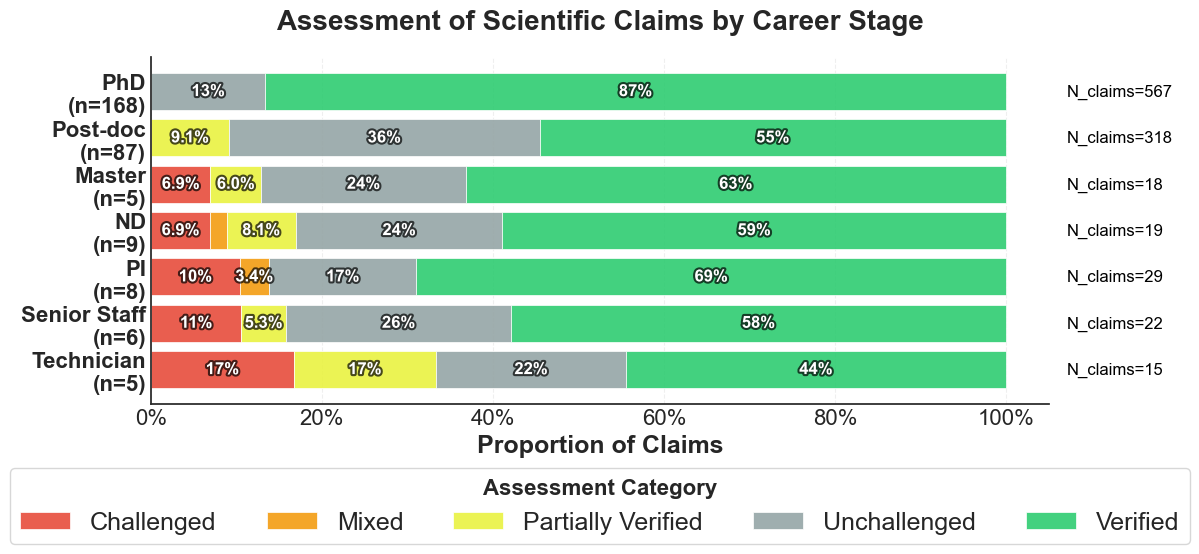

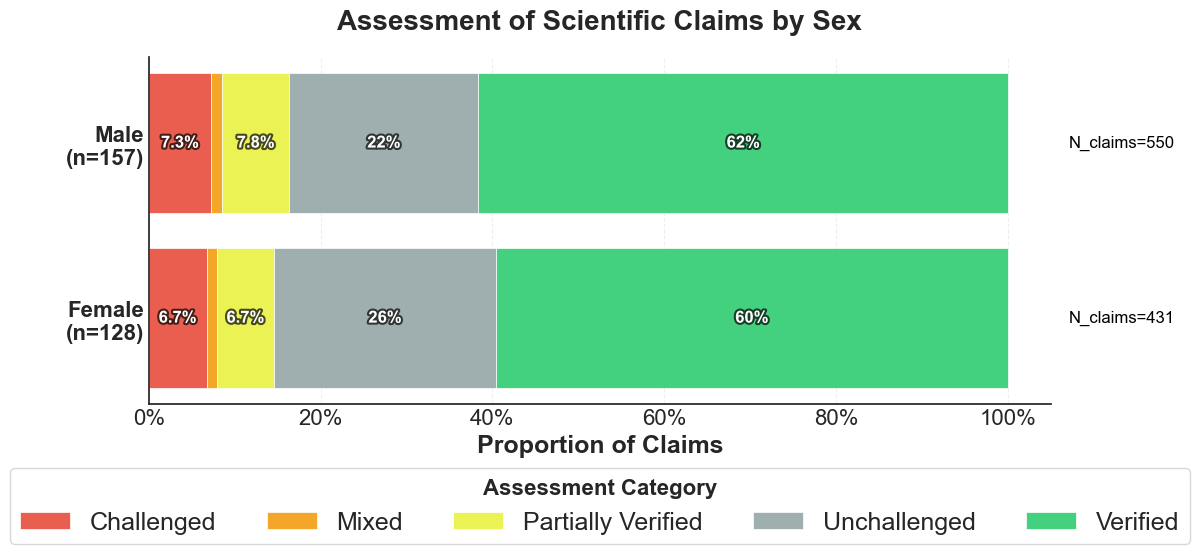

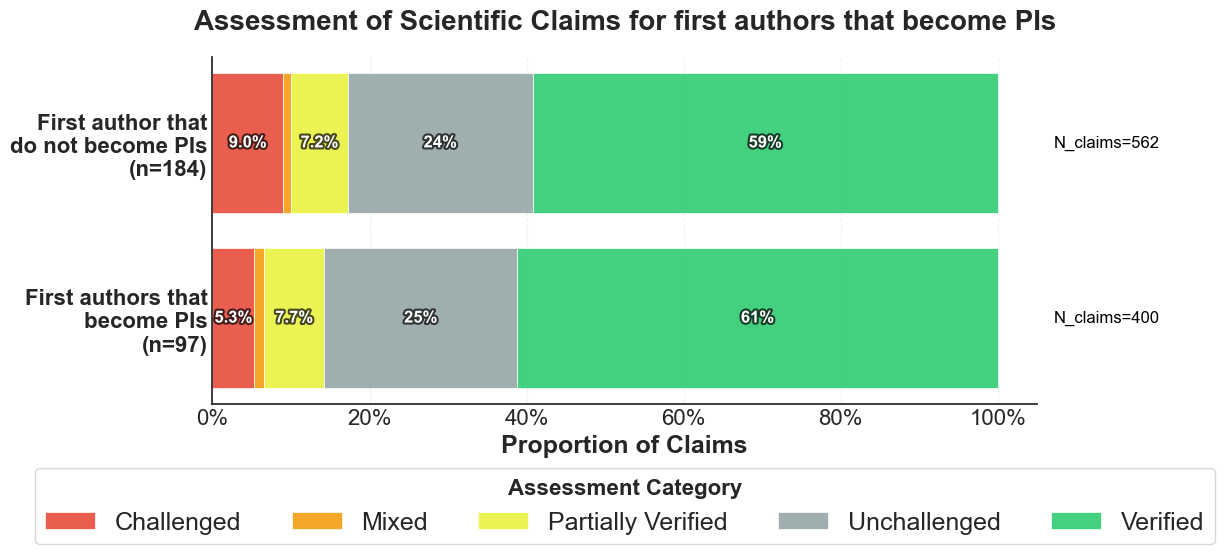

In [5]:
all_categorical_variables = {
            # "PhD Post-doc": {
            #     "labels": ['PhD', 'Post-doc'],
            #     "title": "Assessment of Scientific Claims by Career Stage",
            #     "fig_name_prefix" : "fig5B-Vb_"
            #     },
            # "Is a PI": {
            #     "labels": ['Not PI', 'PI'],
            #     "title": "Assessment of Scientific Claims by Career Stage",
            #     "fig_name_prefix" : "fig5B-Va_"
            #     },
            "First Author Career Stage": {
                "labels": {v:v for v in first_author_claims["First Author Career Stage"].unique()},
                "title": "Assessment of Scientific Claims by Career Stage",
                "fig_name_prefix" : "fig5B_"
                },
            "First Author Sex": {
                "labels": None, 
                "title": "Assessment of Scientific Claims by Sex",
                "fig_name_prefix" : "fig5A_"
            },
            #"MD": {
            #    "labels": ["Not-MD", "MD"],
            #    "title": "Assessment of Scientific Claims by MD Degree",
            #    "fig_name_prefix" : "fig5X_"
            #},
            "First Author Become a PI": {
                "labels": {
                    False:"First author that\ndo not become PIs", 
                    True:"First authors that\nbecome PIs"
                },
                "title": "Assessment of Scientific Claims for first authors that become PIs",
                "fig_name_prefix" : "fig10_"
            }
}

all_comparisons = []

for variable in all_categorical_variables.keys():
    # This was wrong because it overcounted claims when an author had different values for the same variable Utiliser pour les 2025-04-09
    # var_grouped = plot_info.prepare_categorical_variable_data(first_author_claims, author_metrics, variable, 
    #                                                 key_col='first_author_key',
    #                                                 assessment_columns=assessment_columns)
    
    var_grouped = wrangling.create_author_metric(claim_df = first_author_claims, 
                                        variable= variable,
                                        other_col={"Name":('First Author Name', 'first'), 
                                                "n_authors":('first_author_key', 'nunique')}).set_index(variable)

    labels = all_categorical_variables[variable]["labels"]
    #if set(var_grouped.index) == set(labels):
    actual_groups = list(var_grouped.index)
    # Print to check if needed:
    print("Actual groups found:", actual_groups)
    if len(actual_groups) == 2:
        sentence, summary = stat_lib.report_categorical_comparison(var_grouped, 
                                                                        actual_groups, 
                                                                        outcome='Challenged',
                                                                        what_str=f"First Author {variable} ")
        print("\n"+sentence+"\n")
        all_comparisons.append({'Variable': variable, **summary})
    
    explain_df = first_author_claims.groupby(["First Author Name", variable]).agg(**{
        "Major claims":('id', 'count'),
        "Articles":('article_id', 'nunique')
        },
    ).reset_index().pivot(index="First Author Name", columns=variable, values="Major claims")
    explain_df.to_csv(f"figures/figure_tables/{all_categorical_variables[variable]['fig_name_prefix']}categorical_{variable}.csv", 
                    index=True, index_label=f"Name/{variable}", sep=";")


    # Calculate proportions
    for col in assessment_columns:
        var_grouped[f'{col}_prop'] = var_grouped[col] / var_grouped['Major claims']

    print(f"Summary of {variable}:")
    print(var_grouped[['Major claims', 'Articles', 
                        'Verified_prop', 'Challenged_prop', 'Unchallenged_prop']])

    
    labels=all_categorical_variables[variable]["labels"]

    fig, ax = plot_info.create_horizontal_bar_chart(var_grouped, 
                                                    show_p_value=False, 
                                                    labels_map=labels, 
                                                    title=all_categorical_variables[variable]["title"],
                                                    other_n={"authors": "n_authors"})
    plt.savefig(f"figures/{all_categorical_variables[variable]['fig_name_prefix']}categorical_{variable}.png", dpi=300, bbox_inches='tight')

comparison_df = pd.DataFrame(all_comparisons)
comparison_df.to_csv("figures/figure_tables/summary_categorical_comparisons_first.csv", sep=";", index=False)

In [6]:
author_metrics

,first_author_key,Major claims,Articles,First Author Name,Challenged,Mixed,Partially Verified,Unchallenged,Verified,Unchallenged prop,Verified prop,Partially Verified prop,Mixed prop,Challenged prop
0,abdelsadik a,3,1,Abdelsadik A,0,0,0,3,0,1.000000,0.000000,0.000000,0.0,0.0
1,agaisse h,6,2,Agaisse H,0,0,0,2,4,0.333333,0.666667,0.000000,0.0,0.0
2,aggarwal k,2,1,Aggarwal K,0,0,0,0,2,0.000000,1.000000,0.000000,0.0,0.0
3,ao j,3,1,Ao J,0,0,0,1,2,0.333333,0.666667,0.000000,0.0,0.0
4,apidianakis y,6,3,Apidianakis Y,0,0,0,4,2,0.666667,0.333333,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,zhang zhaolin,1,1,Zhang Zhaolin,0,0,0,0,1,0.000000,1.000000,0.000000,0.0,0.0
285,zhang zhenting,1,1,Zhang Zhenting,0,0,0,1,0,1.000000,0.000000,0.000000,0.0,0.0
286,zhao hw,3,1,Zhao HW,0,0,0,2,1,0.666667,0.333333,0.000000,0.0,0.0
287,zhou z,1,1,Zhou Z,0,0,0,0,1,0.000000,1.000000,0.000000,0.0,0.0


In [7]:
to_plot = author_metrics.copy()

/var/folders/pj/15hxgl0j1wg2w_t5k7bvnq5c0000gn/T/ipykernel_62897/744349511.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = to_plot.groupby('Article_bin')['Challenged prop'].median()


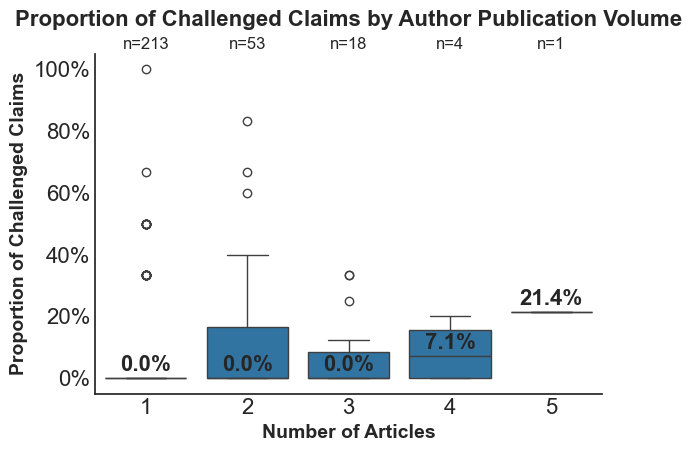

In [8]:

# Create article count bins
article_bins = [.5, 1.5, 2.5, 3.5, 4.5,  float('inf')]
bin_labels =     ['1', '2', '3', '4', '5']
to_plot['Article_bin'] = pd.cut(to_plot['Articles'], bins=article_bins, labels=bin_labels)

# Create the boxplot
ax = sns.boxplot(x='Article_bin', y='Challenged prop', data=to_plot)
#ax = sns.stripplot(x='Article_bin', y='Challenged prop', data=to_plot, alpha=0.3, jitter=True, jitter_size=.95, color='black')

# Add individual data points
#sns.stripplot(x='Article_bi  n', y='Challenged prop', data=to_plot, 
#              color='black', alpha=0.3, jitter=True)

# Add count annotations below each category
for i, cat in enumerate(bin_labels):
    count = len(to_plot[to_plot['Article_bin'] == cat])
    ax.text(i, 1.05, f"n={count}", ha='center', va='top', fontsize=12,
            transform=ax.get_xaxis_transform())

# Format the y-axis as percentage
ax.yaxis.set_major_formatter(plot_info.PercentFormatter(1.0))

# Add labels and title
plt.xlabel('Number of Articles', fontsize=14, fontweight='bold')
plt.ylabel('Proportion of Challenged Claims', fontsize=14, fontweight='bold')
plt.title('Proportion of Challenged Claims by Author Publication Volume', 
          fontsize=16, fontweight='bold', pad=20)

# Add median values on top of each box
medians = to_plot.groupby('Article_bin')['Challenged prop'].median()
for i, m in enumerate(medians):
    ax.text(i, m + 0.01, f"{m:.1%}", ha='center', va='bottom', fontweight='bold')

# Remove top and right spines
sns.despine()

plt.tight_layout()
# plt.savefig('figures/fig4B-nb_article_V1.png', dpi=300, bbox_inches='tight')

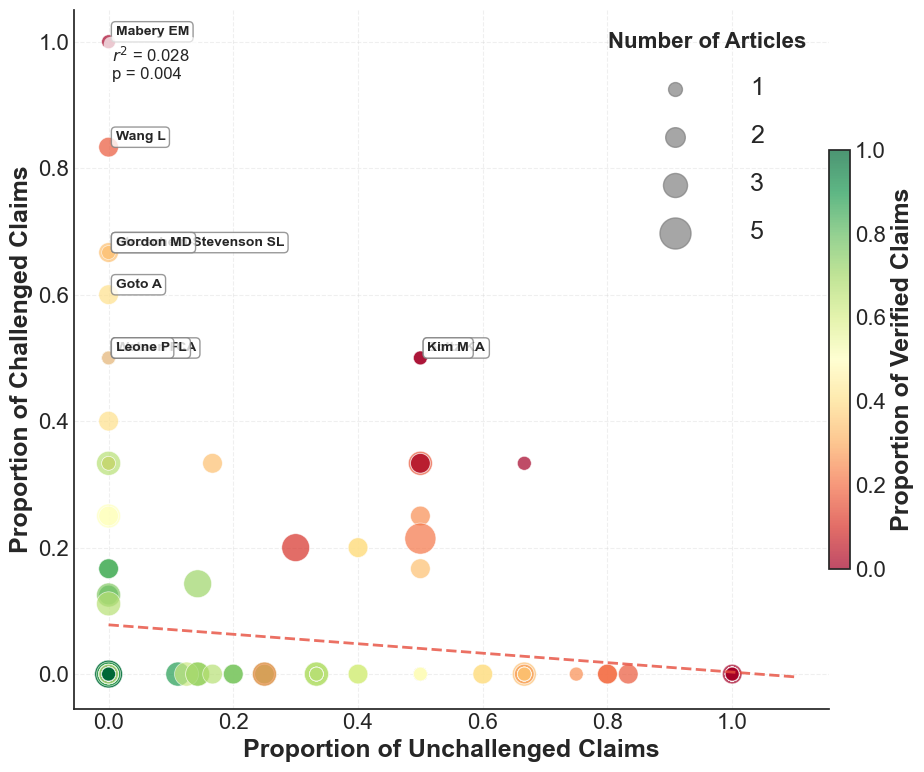

In [9]:
fig1, ax1 = plot_info.create_challenged_vs_unchallenged_scatter(to_plot,size_mult=100, name_col='First Author Name',)

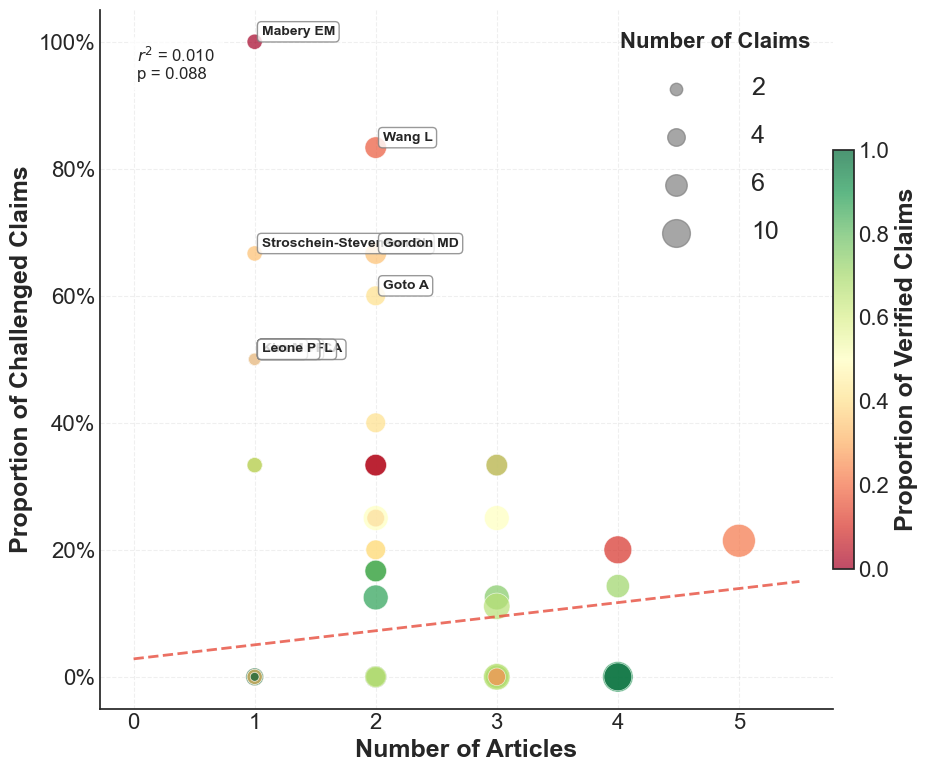

In [10]:

fig2, ax2 = plot_info.create_challenged_vs_articles_scatter(to_plot, name_col='First Author Name')
plt.savefig(f'figures/fig5C_scatterA.png', dpi=300, bbox_inches='tight')



<Axes: xlabel='Articles'>

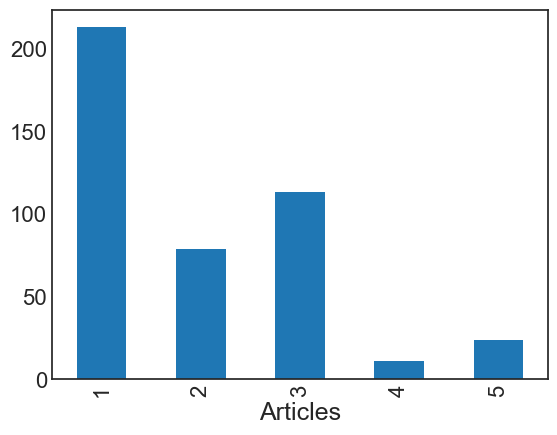

In [11]:
to_plot["Major claims"].value_counts().sort_index().plot(kind='bar')    
to_plot["Articles"].value_counts().sort_index().plot(kind='bar')    

### Continuous Variables

/Users/chadi/Research/drosophila-reproducibility/plot_info.py:1418: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


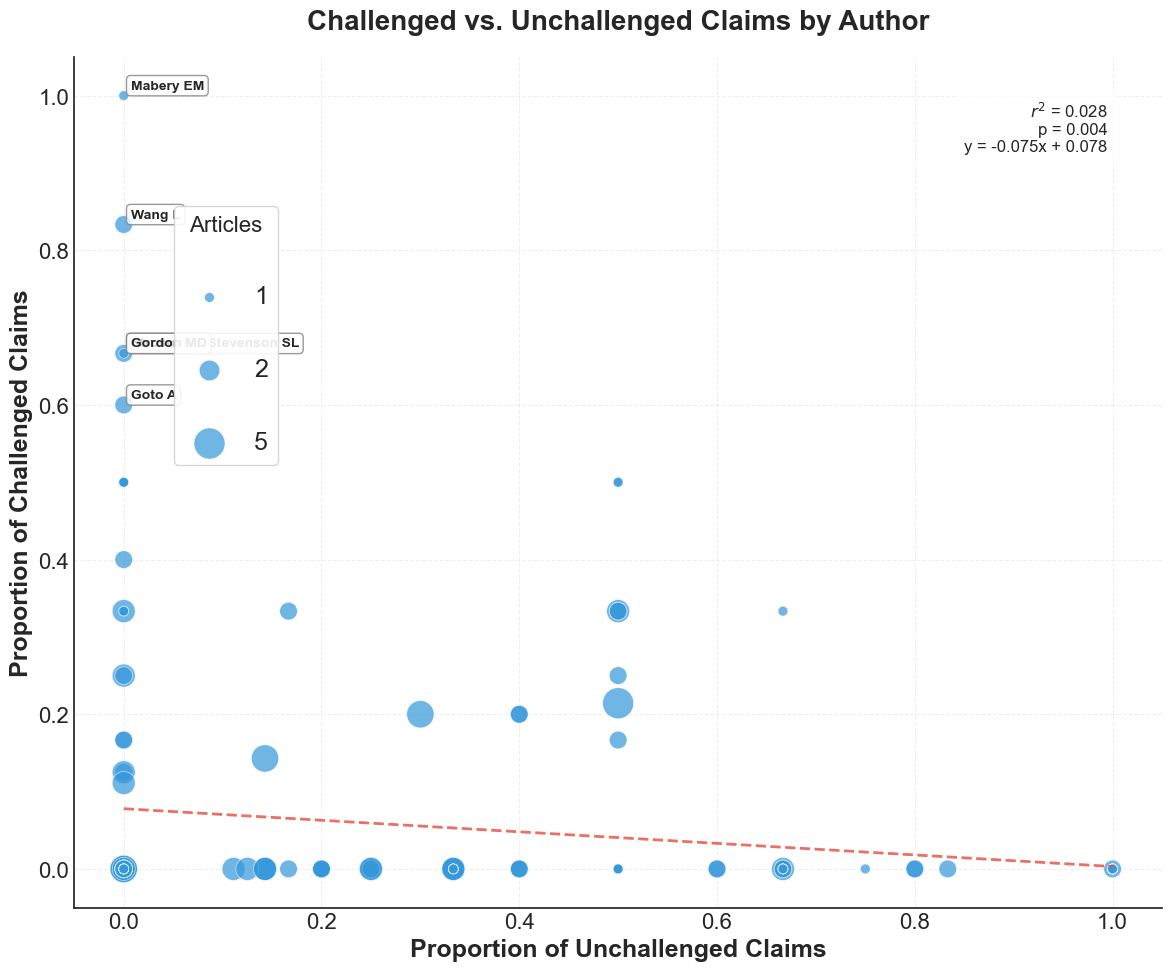

In [12]:
fig, ax = plot_info.create_publication_scatter(
    to_plot,
    x_var='Unchallenged prop', 
    y_var='Challenged prop',
    size_var='Articles', 
    title='Challenged vs. Unchallenged Claims by Author',
    x_label='Proportion of Unchallenged Claims',
    y_label='Proportion of Challenged Claims',
    annotate_top_n=5, name_col='First Author Name'
)
#plt.savefig(f'figures/fig4C_scatterB', dpi=300, bbox_inches='tight')